# import required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [3]:
data = pd.read_csv(r'Documents\boat_data.csv')

In [4]:
data.head(3)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124


# Exploratory Data Analysis

In [7]:
# view the shape
data.shape

(9888, 10)

In [8]:
# view the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [9]:
# descriptive analysis
data.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


### find null values

In [12]:
data.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

### plot length distribution

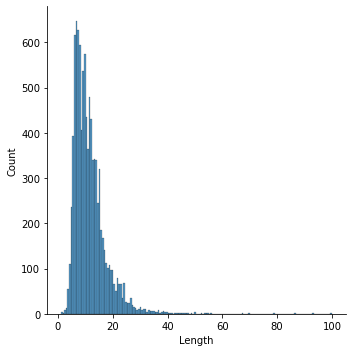

In [13]:
sns.displot(data['Length'])

### plot width distribution

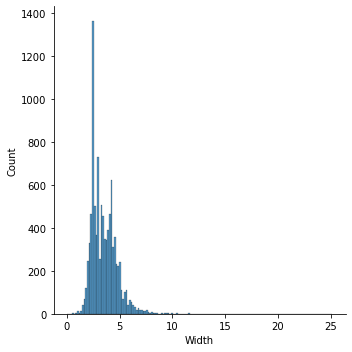

In [14]:
sns.displot(data['Width'])

In [15]:
# filling null width and length with there mean
length_mean = np.round(data['Length'].mean(), 2)
width_mean  = np.round(data['Width'].mean(), 2)

data['Length'].fillna(length_mean, inplace=True)
data['Width'].fillna(width_mean, inplace=True)

### Check for null values

In [20]:
# replacing all the remaining null values with unknown
data.fillna('Unknown', inplace=True)

In [21]:
data.isna().any()

Price                          False
Boat Type                      False
Manufacturer                   False
Type                           False
Year Built                     False
Length                         False
Width                          False
Material                       False
Location                       False
Number of views last 7 days    False
dtype: bool

In [22]:
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [24]:
data['Year Built'].replace(0, 2020, inplace=True)

In [26]:
# check if the instruction above was effective
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,2020,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


#### plotting the relationship between price and number of views last 7 days

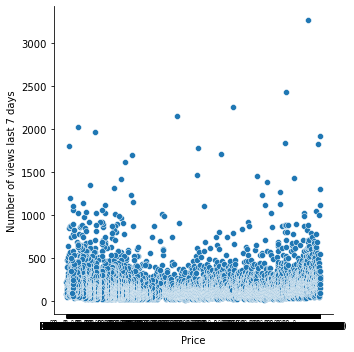

In [28]:
sns.relplot(data=data, x='Price', y='Number of views last 7 days')

### Most Viewed

In [29]:
most_viewed = data.loc[ data['Number of views last 7 days'] > 499 ]

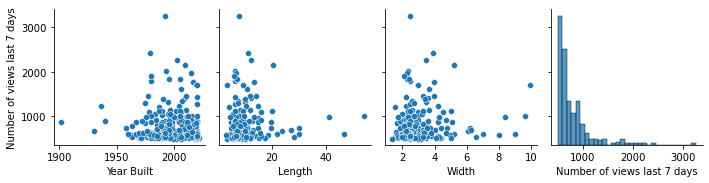

In [30]:
sns.pairplot(most_viewed, y_vars=['Number of views last 7 days'])

In [73]:
most_viewed = data[data['Number of views last 7 days'] > 700].sort_values('Number of views last 7 days', ascending=False)

In [74]:
most_viewed

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_USD
9580,16125.54,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263,16125.54
8723,37878.79,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland Â» Neuenburgersee Â» Hauterive,2432,37878.79
6211,136255.41,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland Â» Lago Maggiore Â» 6600 Locarno,2261,136255.41
3700,1071106.09,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt in Holstein (Ostsee),2154,1071106.09
308,21536.80,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland Â» Murtensee Â» Avenches,2026,21536.80
...,...,...,...,...,...,...,...,...,...,...,...
9409,20562.77,Bowrider,Larson power boats,"Used boat,Unleaded",1998,6.07,2.47,GRP,Switzerland Â» Lake Geneva Â» Port de Founex,709,20562.77
9569,16233.77,Cabin Boat,Unknown,"Used boat,Diesel",1985,6.90,2.55,GRP,Switzerland Â» Lake Constance Â» Landschlacht,708,16233.77
7838,61147.19,Cabin Boat,Rinker power boats,"Used boat,Unleaded",2008,7.47,2.59,GRP,Switzerland Â» Lake Geneva Â» Morges,708,61147.19
8736,37878.79,Motor Yacht,Sunseeker power boats,Used boat,1990,9.42,3.30,GRP,Switzerland Â» Ermatingen,706,37878.79


In [62]:
most_viewed['Type'].value_counts()

Used boat,Unleaded              168
Used boat,Diesel                 72
Used boat                        14
new boat from stock,Unleaded      7
new boat from stock               3
new boat on order                 3
Display Model,Unleaded            3
new boat from stock,Diesel        3
new boat on order,Diesel          2
new boat on order,Unleaded        1
Display Model,Diesel              1
Display Model                     1
Name: Type, dtype: int64

In [64]:
most_viewed['Manufacturer'].value_counts()

Unknown                                     15
Sea Ray power boats                         15
Windy power boats                           11
Sunseeker power boats                       10
Bayliner power boats                        10
                                            ..
Terhi power boats                            1
Rodriguez Group (Italyachts) power boats     1
Majesty Yachts power boats                   1
Azimut power boats                           1
Lambro power boats                           1
Name: Manufacturer, Length: 119, dtype: int64

In [70]:
most_viewed['Boat Type'].value_counts()

Sport Boat                                  61
Motor Yacht                                 40
Cabin Boat                                  38
Wakeboard/Wakesurf                          15
Bowrider                                     8
Classic,Runabout                             8
Classic                                      7
Flybridge                                    7
Hardtop                                      7
Fishing Boat                                 6
Mega Yacht                                   5
Runabout                                     5
Cabin Boat,Motor Yacht,Sport Boat            4
Offshore Boat                                4
Pilothouse                                   4
House Boat                                   4
Motor Yacht,Sport Boat                       4
Deck Boat                                    3
Sport Boat,Wakeboard/Wakesurf,Water ski      3
Classic,Sport Boat                           3
Cabin Boat,Motor Yacht                       3
Cabin Boat,Tr

### characteristics of the most viewed boat listings in the last 7 days

In [71]:
data.loc[ data['Number of views last 7 days'] == data['Number of views last 7 days'].nlargest(1).item() ]

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_USD
9580,16125.54,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.7,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263,16125.54


is it the most expensive boats that get the most views?
* The above are the top 10 most viewd boats. If we look at the price column we can see that its price is not the highest, meaning that it doesn't have to be expensive to get more views. Like lets take the 3rd boat from the table it's price is 125900 which is more that the 1st boat in the table.

most viewed type : with respect to its number of occurrence
* Used boat,Unleaded               168
* Used boat,Diesel                 72
* Used boat                        14
* new boat from stock,Unleaded     7

most viewed Boat Type : with respect to its number of occurrence
* Sport Boat                                  61
* Motor Yacht                                 40
* Cabin Boat                                  38
* Wakeboard/Wakesurf                          15